In [22]:
import pandas as pd
df = pd.read_csv("../data/pharmacy_data.csv")  
df.head()

,product_id,product_name,category,quantity_in_stock,sales_last_30_days,sell_price,branch_name
0,1000010,ABILIFY 10MG 10/TAB™,PHARMA,13,1,220.5,ابو داود الظاهري
1,1000011,ABILIFY 15MG 10/TAB™,PHARMA,7,1,330.5,ابو داود الظاهري
2,1000012,ABILIFY 5MG 10/TAB™,PHARMA,3,1,134.5,ابو داود الظاهري
3,1000014,ABIMOL 500MG 20/TAB,PHARMA,1,2,24.0,ابو داود الظاهري
4,1000015,ABIMOL EXTRA 500MG 20/TAB,PHARMA,3,1,28.0,ابو داود الظاهري


In [23]:
print("Shape:", df.shape)
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

Shape: (50465, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50465 entries, 0 to 50464
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          50465 non-null  int64  
 1   product_name        50465 non-null  object 
 2   category            50465 non-null  object 
 3   quantity_in_stock   50465 non-null  int64  
 4   sales_last_30_days  50465 non-null  int64  
 5   sell_price          50465 non-null  float64
 6   branch_name         50465 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB
None

Missing values per column:
 product_id            0
product_name          0
category              0
quantity_in_stock     0
sales_last_30_days    0
sell_price            0
branch_name           0
dtype: int64


In [24]:
df.describe()

,product_id,quantity_in_stock,sales_last_30_days,sell_price
count,5.046500e+04,50465.000000,50465.000000,50465.000000
mean,1.236256e+06,4.173546,1.846924,210.871182
std,1.148824e+06,61.819417,5.016030,428.625280
min,1.200000e+01,-733.000000,0.000000,0.010000
25%,6.432800e+04,1.000000,0.000000,59.000000
50%,1.006593e+06,2.000000,1.000000,120.000000
75%,2.010385e+06,3.000000,2.000000,245.000000
max,1.200002e+07,11992.000000,289.000000,53747.000000


In [25]:
# Total sales (30d)
total_sales = df["sales_last_30_days"].sum()
print(f"Total sales (30d): {total_sales} units")

# Average daily sales per product
avg_daily_sales = (df["sales_last_30_days"] / 30).mean()
print(f"Average daily sales per product: {avg_daily_sales:.2f}")

# Sales by branch
sales_by_branch = df.groupby("branch_name")["sales_last_30_days"].sum()
display(sales_by_branch)

# Top 5 best-sellers
display(df.nlargest(5, "sales_last_30_days")[["product_name", "sales_last_30_days"]])

# Low-stock (<10 units)
display(df[df["quantity_in_stock"] < 10][["product_name", "quantity_in_stock"]])

# Stagnant (sales<5 & stock>50)
display(df[(df["sales_last_30_days"] < 5) & (df["quantity_in_stock"] > 50)])


Total sales (30d): 93205 units
Average daily sales per product: 0.06


branch_name
ابو داود الظاهري               10349
الطيران - مدينه نصر            10467
القصر العيني                    8757
المريوطيه                       8515
المعادي - اللاسلكى             11149
المهندسين - البطل               8626
عرب المعادي                     8446
عمار ابن ياسر - مصر الجديده     8490
فيصل                            9128
هايد بارك - التجمع              9278
Name: sales_last_30_days, dtype: int64

,product_name,sales_last_30_days
14464,CHLORAL HYDRATE 10% ORAL DROP 15ML,289
28782,CHLORAL HYDRATE 10% ORAL DROP 15ML,289
33834,CHLORAL HYDRATE 10% ORAL DROP 15ML,289
43048,CHLORAL HYDRATE 10% ORAL DROP 15ML,289
49191,CHLORAL HYDRATE 10% ORAL DROP 15ML,289


,product_name,quantity_in_stock
1,ABILIFY 15MG 10/TAB™,7
2,ABILIFY 5MG 10/TAB™,3
3,ABIMOL 500MG 20/TAB,1
4,ABIMOL EXTRA 500MG 20/TAB,3
5,ABIMOL INF. 300MG 5/SUPP.,1
...,...,...
50460,YOLO LIMITED EDITION NAIL POLISH 10ML / 131,3
50461,FITMOTUS 30/TAB,1
50462,JOINT GUARD ULTRA 30/CAP,2
50463,PIC ONERAPID ARM DIGITAL BP MONITOR,1


,product_id,product_name,category,quantity_in_stock,sales_last_30_days,sell_price,branch_name
1500,1008112,RANI 20MG 6/EFF.SACH.,GIT CARE,94,4,42.0,ابو داود الظاهري
3506,2028340,YOLO ACETONE NAIL REMOVER 135 ML ALL,BEAUTY ACCESSORIES,79,1,65.0,ابو داود الظاهري
4295,4004283,SYRING 3ML PEDIATRIC سرنجة اطفال,CONSUMABLE,338,0,4.5,ابو داود الظاهري
4297,4004286,SYRINGE 20MLسرنجة,CONSUMABLE,51,4,11.0,ابو داود الظاهري
4548,57389,DOLPHIN ORAL SYRINGE 5ML,CONSUMABLE,72,0,3.0,ابو داود الظاهري
...,...,...,...,...,...,...,...
48482,4001590,GAUZE BANDAGE 10CM شاش,GRE,70,1,10.0,الطيران - مدينه نصر
48485,4001596,GAUZE BANDAGE 7CM شاش,GRE,84,1,8.0,الطيران - مدينه نصر
48513,4002894,MEDICAL COTTON 100G قطن,GRE,66,3,20.0,الطيران - مدينه نصر
48585,4004286,SYRINGE 20MLسرنجة,CONSUMABLE,101,4,11.0,الطيران - مدينه نصر


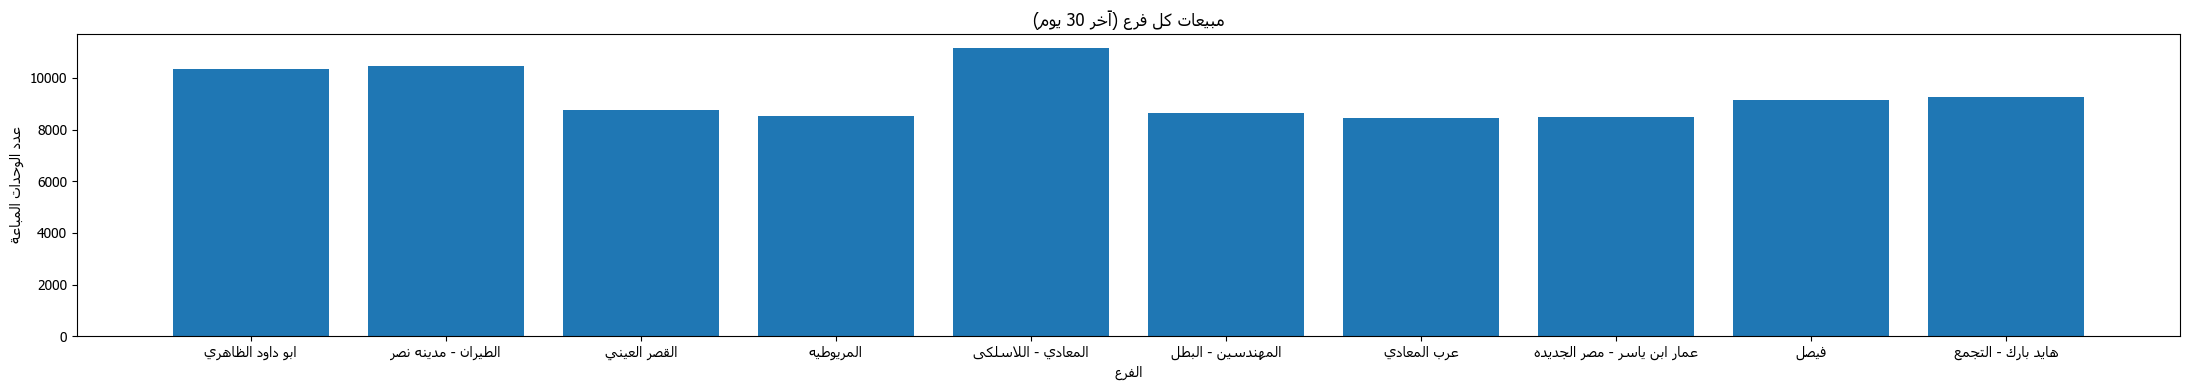

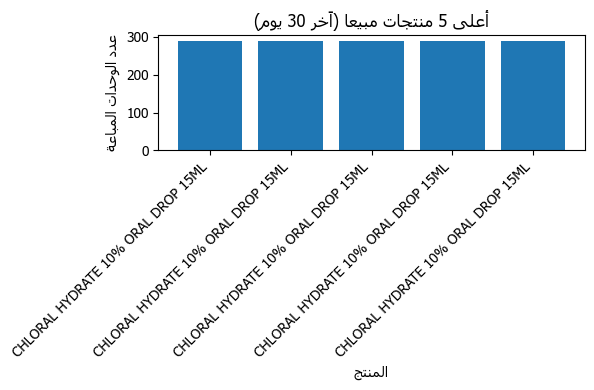

In [26]:
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

plt.rcParams['font.family'] = 'Tahoma'  

def ar(text):
    """إعادة تشكيل النص العربي وضبط اتجاهه."""
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# 2) مبيعات كل فرع
sales_by_branch = df.groupby("branch_name")["sales_last_30_days"].sum()
branches = sales_by_branch.index.tolist()
sales = sales_by_branch.values.tolist()

arabic_branch_labels = [ar(lbl) for lbl in branches]
fig, ax = plt.subplots(figsize=(22, 4))
ax.bar(range(len(branches)), sales)
ax.set_xticks(range(len(branches)))
ax.set_xticklabels(arabic_branch_labels, rotation=0, ha='center')
ax.set_title(ar("مبيعات كل فرع (آخر 30 يوم)"))
ax.set_xlabel(ar("الفرع"))
ax.set_ylabel(ar("عدد الوحدات المباعَة"))
plt.tight_layout()
plt.show()

# 3) أعلى 5 منتجات مبيعًا
top5 = df.nlargest(5, "sales_last_30_days")
products = top5["product_name"].tolist()
counts = top5["sales_last_30_days"].tolist()

arabic_prod_labels = [ar(p) for p in products]
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(range(len(products)), counts)
ax.set_xticks(range(len(products)))
ax.set_xticklabels(arabic_prod_labels, rotation=45, ha='right')
ax.set_title(ar("أعلى 5 منتجات مبيعًا (آخر 30 يوم)"))
ax.set_xlabel(ar("المنتج"))
ax.set_ylabel(ar("عدد الوحدات المباعَة"))
plt.tight_layout()
plt.show()


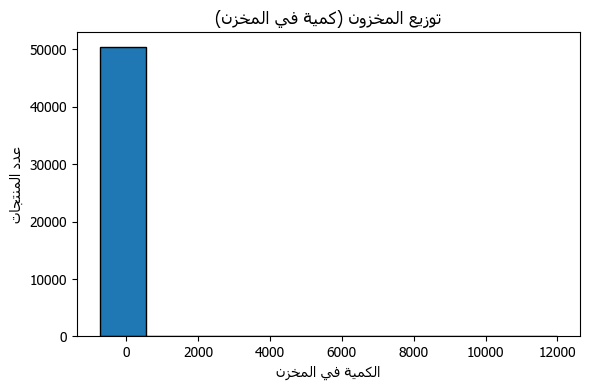

In [27]:
# 4) Histogram لتوزيع الكمية في المخزن
quantities = df["quantity_in_stock"].tolist()

fig, ax = plt.subplots(figsize=(6,4))
ax.hist(quantities, bins=10, edgecolor='black')
ax.set_title(ar("توزيع المخزون (كمية في المخزن)"))
ax.set_xlabel(ar("الكمية في المخزن"))
ax.set_ylabel(ar("عدد المنتجات"))
plt.tight_layout()
plt.show()


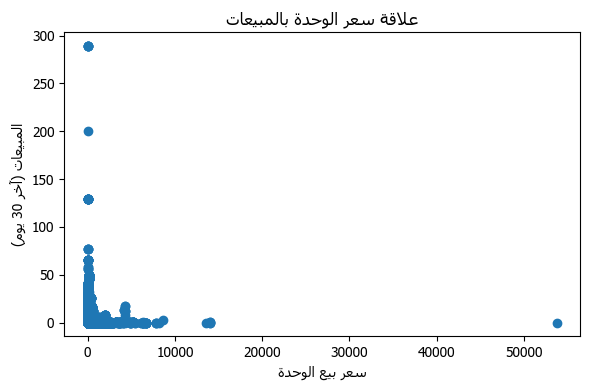

In [28]:
# 5) Scatter للسعر مقابل المبيعات
prices = df["sell_price"].tolist()
sales = df["sales_last_30_days"].tolist()

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(prices, sales)
ax.set_title(ar("علاقة سعر الوحدة بالمبيعات"))
ax.set_xlabel(ar("سعر بيع الوحدة"))
ax.set_ylabel(ar("المبيعات (آخر 30 يوم)"))
plt.tight_layout()
plt.show()


In [29]:
# منتجات مبيعاتها عالية ومخزونها قليل
low_stock_high_sales = df[
    (df["sales_last_30_days"] > 20) & 
    (df["quantity_in_stock"] < 10)
].sort_values(by="sales_last_30_days", ascending=False)

# عرض أهم الأعمدة
cols_to_show = ["product_id", "product_name", "category", "quantity_in_stock", "sales_last_30_days", "branch_name"]
display(low_stock_high_sales[cols_to_show])


,product_id,product_name,category,quantity_in_stock,sales_last_30_days,branch_name
28782,6000037,CHLORAL HYDRATE 10% ORAL DROP 15ML,PHARMA,4,289,المعادي - اللاسلكى
43048,6000037,CHLORAL HYDRATE 10% ORAL DROP 15ML,PHARMA,1,289,هايد بارك - التجمع
33834,6000037,CHLORAL HYDRATE 10% ORAL DROP 15ML,PHARMA,4,289,عرب المعادي
8319,200200,رسوم ادارية - امان AMAN,Services,-436,77,فيصل
13383,200200,رسوم ادارية - امان AMAN,Services,-733,77,القصر العيني
...,...,...,...,...,...,...
12140,1005748,LIPANTHYL SUPRA 160MG 30/CAP,CARDIOVASCULAR,4,21,القصر العيني
35534,1005748,LIPANTHYL SUPRA 160MG 30/CAP,CARDIOVASCULAR,5,21,عمار ابن ياسر - مصر الجديده
31622,1005748,LIPANTHYL SUPRA 160MG 30/CAP,CARDIOVASCULAR,1,21,عرب المعادي
24561,1005748,LIPANTHYL SUPRA 160MG 30/CAP,CARDIOVASCULAR,9,21,المعادي - اللاسلكى


In [33]:
# تحليل المنتجات الراكدة (مخزون عالي + مبيعات قليلة)
slow_moving = df[
    (df["quantity_in_stock"] > 50) & 
    (df["sales_last_30_days"] < 5)
].sort_values(by="quantity_in_stock", ascending=False)

# عرض أهم الأعمدة
cols_to_show = ["product_id", "product_name", "category", "quantity_in_stock", "sales_last_30_days", "branch_name"]
display(slow_moving[cols_to_show])


,product_id,product_name,category,quantity_in_stock,sales_last_30_days,branch_name
22707,60908,PIC OPTISOFT COMFORT EYE PADS 95*65MM 100 PCS,FIRST AID,11992,0,المهندسين - البطل
27982,4004283,SYRING 3ML PEDIATRIC سرنجة اطفال,CONSUMABLE,790,0,المعادي - اللاسلكى
22126,4004283,SYRING 3ML PEDIATRIC سرنجة اطفال,CONSUMABLE,588,0,المهندسين - البطل
13723,2022178,PAPIA POCKET TISSUES 10PCS,NON PHARMA,364,2,القصر العيني
4295,4004283,SYRING 3ML PEDIATRIC سرنجة اطفال,CONSUMABLE,338,0,ابو داود الظاهري
...,...,...,...,...,...,...
26444,2013314,GLORY MAHOGANY HENNA 1/SACHET,HAIR COLOURING,52,0,المعادي - اللاسلكى
14703,62141,GLUCOSE INTRA PHARM DEXTROSE 10% 500ML,HOSPITAL MEDICINES,51,2,القصر العيني
4297,4004286,SYRINGE 20MLسرنجة,CONSUMABLE,51,4,ابو داود الظاهري
26648,2017545,LUNA EMOLLIENT LIP THERAPY,FACE CARE,51,2,المعادي - اللاسلكى


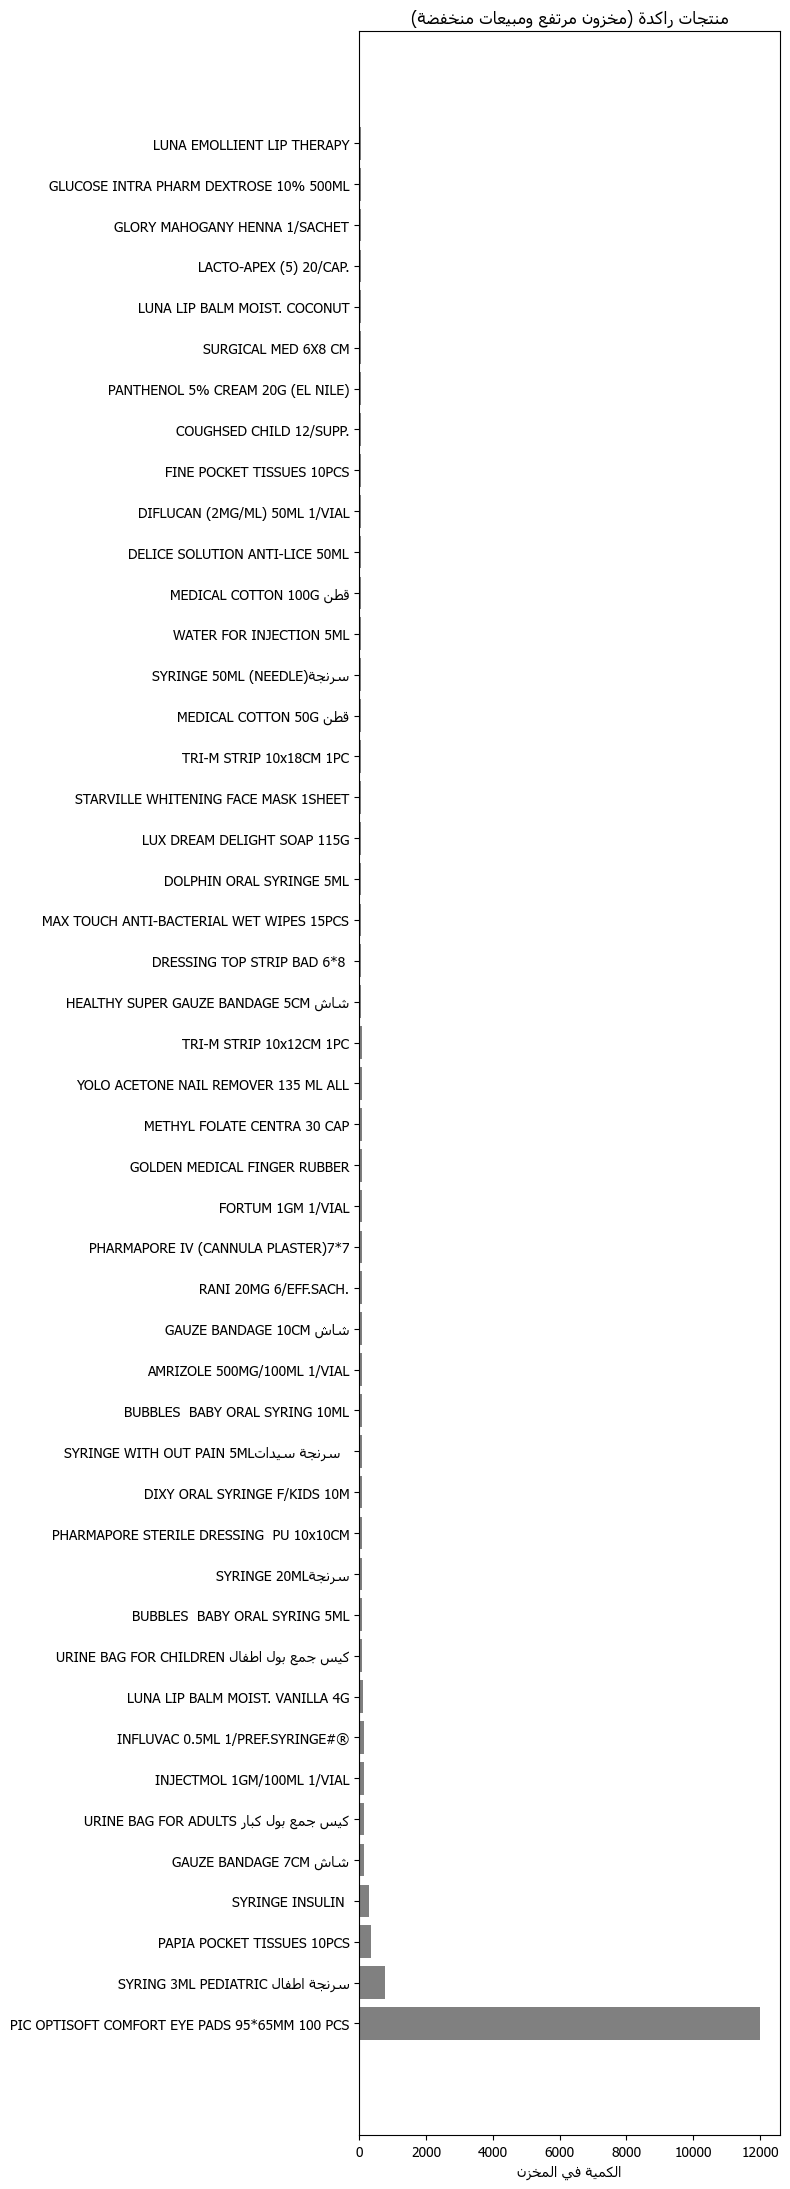

In [35]:
# رسم المنتجات الراكدة
products = slow_moving["product_name"].tolist()
quantities = slow_moving["quantity_in_stock"].tolist()

fig, ax = plt.subplots(figsize=(8, 22))
ax.barh([ar(p) for p in products], quantities, color="gray")
ax.set_title(ar("منتجات راكدة (مخزون مرتفع ومبيعات منخفضة)"))
ax.set_xlabel(ar("الكمية في المخزن"))
plt.tight_layout()
plt.show()
